In [1]:
#Gerekli import işlemlerini gerçekleştirdim. 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df= pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
#değişkenin boyut bilgisine bakalım
df.shape

(34857, 21)

In [4]:
#Baştan gözlemleyelim
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
#Sondan gözlemleyelim
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,2.0,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [6]:
#tip bilgisine bakalım
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
#veriseti hakkında bilgilere bakalım. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [8]:
#Veri setindeki istatisliklere bakalım. 
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [9]:
def grab_col_names(df, cat_th=10, car_th=20):
   """ 
   Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    
   Parameters
   ----------
   dataframe: df
        değişken isimleri alınmak istenen dataframedir.
   cat_th= int, float
        nümerik fakat kategorik olan değişkenler için sınıf eşik değeri
   car_th: int,float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    --------
    cat_cols: List
        Kategorik değişken listesi
    num_cols: List
        Nümerik değişken listesi
    cat_but_car: List
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde
        Return olan 3 Liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı
   """

   
   cat_cols = [col for col in df.columns if df[col].dtypes == "O" ]
   num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                   df[col].dtypes != "O"]
   cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and 
                  df[col].dtypes == "O"]

   cat_cols = cat_cols + num_but_cat
   cat_cols = [ col for col in cat_cols if col not in cat_but_car]

   num_cols = [col for col in df.columns if df[col].dtypes != "O"]
   num_cols = [col for col in num_cols if col not in num_but_cat]

   print(f"Observations : {df.shape[0]}")
   print(f"Variables : {df.shape[1]}")
   print(f"cat_cols: {len(cat_cols)}")
   print(f"num_cols: {len(num_cols)}")
   print(f"cat_but_car:{len(cat_but_car)}")
   print(f"num_but_cat:{len(num_but_cat)}")
   return cat_cols, num_cols, cat_but_car
   
   

In [10]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations : 34857
Variables : 21
cat_cols: 3
num_cols: 13
cat_but_car:5
num_but_cat:0


In [11]:
grab_col_names(df)

Observations : 34857
Variables : 21
cat_cols: 3
num_cols: 13
cat_but_car:5
num_but_cat:0


(['Type', 'Method', 'Regionname'],
 ['Rooms',
  'Price',
  'Distance',
  'Postcode',
  'Bedroom2',
  'Bathroom',
  'Car',
  'Landsize',
  'BuildingArea',
  'YearBuilt',
  'Lattitude',
  'Longtitude',
  'Propertycount'],
 ['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea'])

In [12]:
#Veri setinde herhangi bir eksik değer var mı bakalım.
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [13]:
# Burada kategorik değişkenlerin yerine mod ile doldurdum.Nümerik değişkenlerin yerine medyan ile doldurdum.
for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode().iloc[0])

  for column in num_cols:
    df[column] = df[column].fillna(df[column].median())

In [14]:
#Tekrar eden değerleri veri setinden kaldırdım.
df.drop_duplicates(inplace=True)

In [15]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [16]:
#Bu değişikliklerden sonra veri setimin boyutu nasıl değişti inceleyelim 
df.shape

(34856, 21)

In [17]:
#Burada describe istatistiklerine tekrar bakarak hangi değişkenlerin en çok outlier içerdiğini bulalım.
round((df.describe().T),2)

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,34856.0,1010841.84,572006.86,85000.00,695000.00,870000.00,1150000.00,11200000.00
Distance,34856.0,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34856.0,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,34856.0,3.06,0.86,0.00,3.00,3.00,3.00,30.00
Bathroom,34856.0,1.71,0.65,0.00,1.00,2.00,2.00,12.00
Car,34856.0,1.80,0.88,0.00,1.00,2.00,2.00,26.00
Landsize,34856.0,569.01,2763.95,0.00,357.00,521.00,598.00,433014.00
BuildingArea,34856.0,145.56,252.23,0.00,136.00,136.00,136.00,44515.00
YearBuilt,34856.0,1967.90,25.04,1196.00,1970.00,1970.00,1970.00,2106.00


Aykırı Değerler YearBuilt=1116, Landsize Ve Building Area olarak gözükmektedir. Onları veri setimizden Z-Score ile kaldıralım.

### VERİ GÖRSELLEŞTİRME

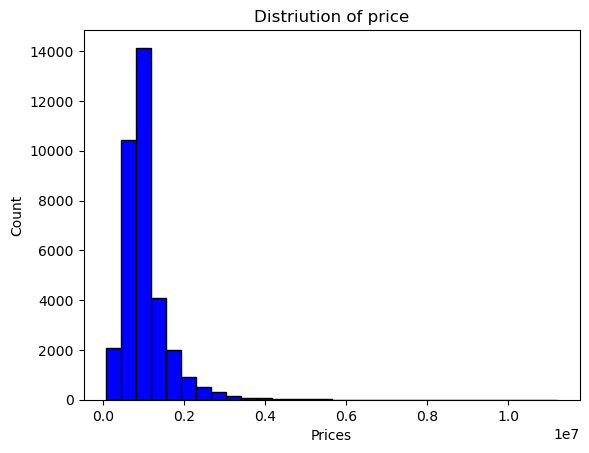

In [18]:
plt.hist(df['Price'], bins=30, color='blue', edgecolor='black')
plt.title('Distriution of price')
plt.xlabel('Prices')
plt.ylabel('Count')
plt.show()


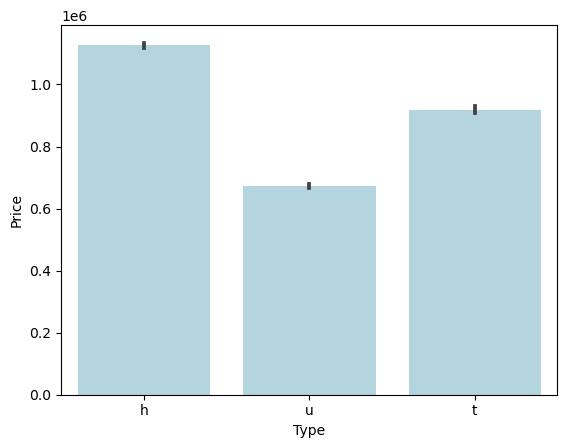

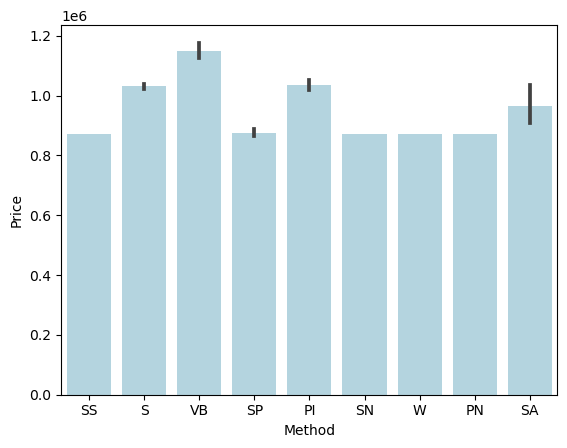

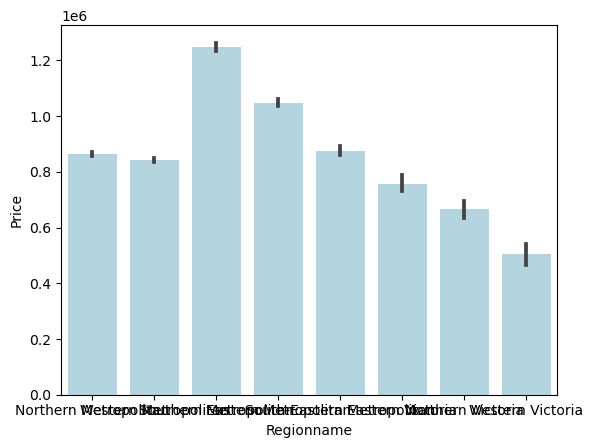

In [19]:
#Kategorik değerleri görselleştirelim
sns.barplot(x="Type" , y="Price", data=df, color="lightblue")
plt.show()
sns.barplot(x="Method" , y="Price", data=df, color="lightblue")
plt.show()
sns.barplot(x="Regionname" , y="Price", data=df, color="lightblue")
plt.show()

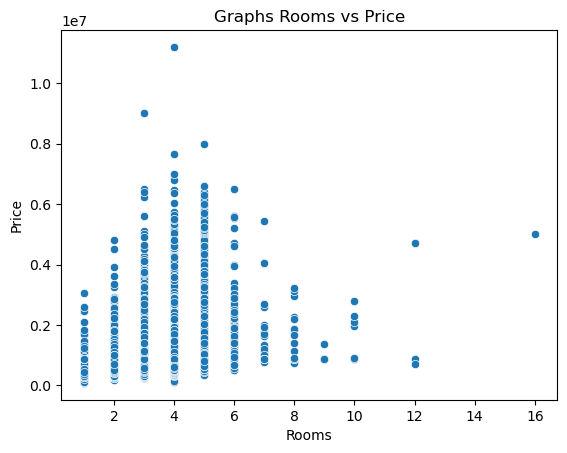

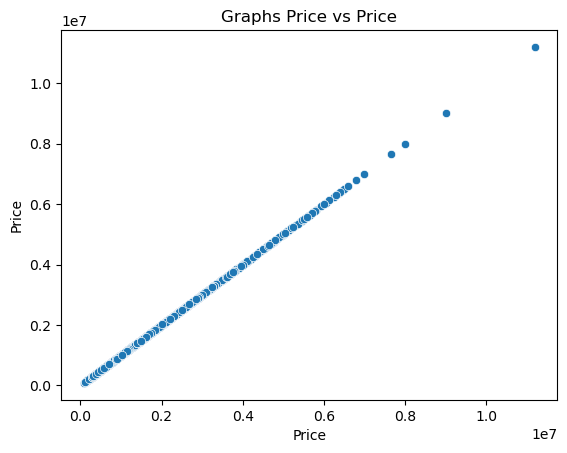

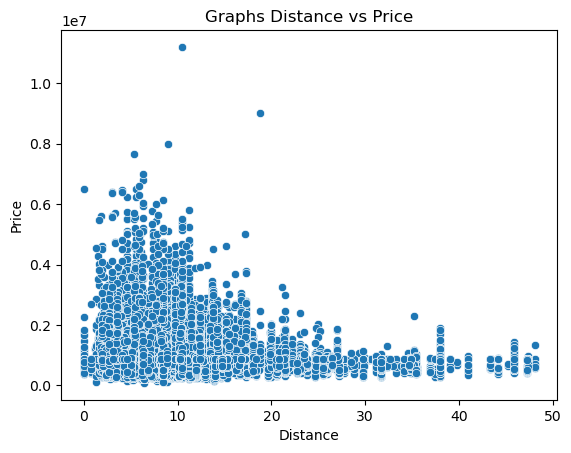

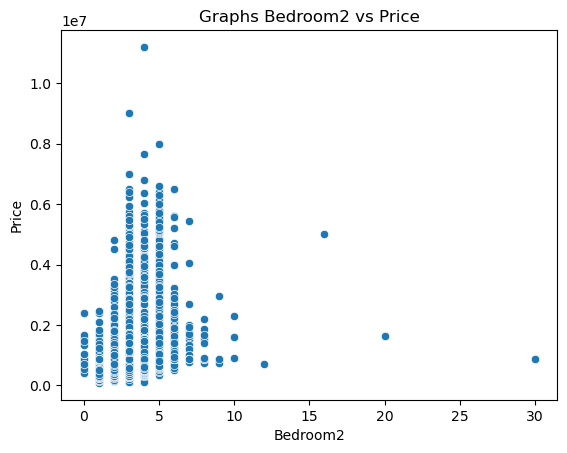

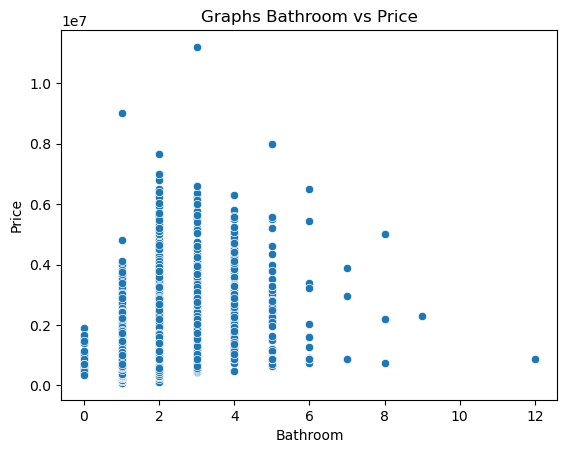

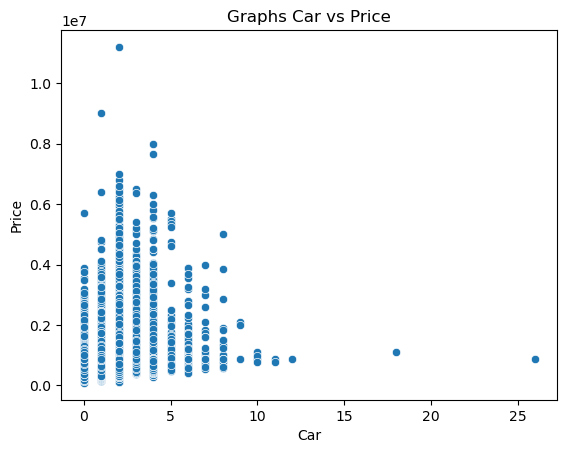

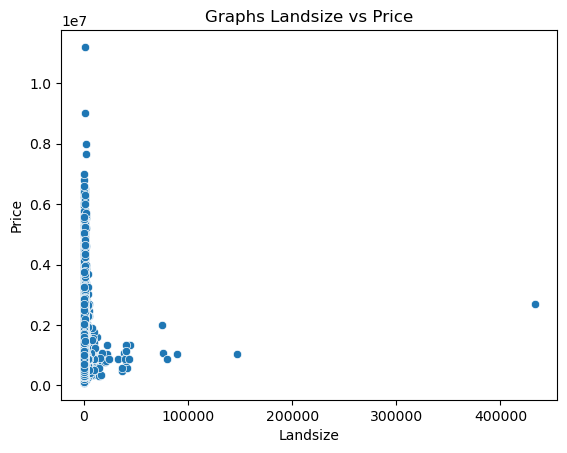

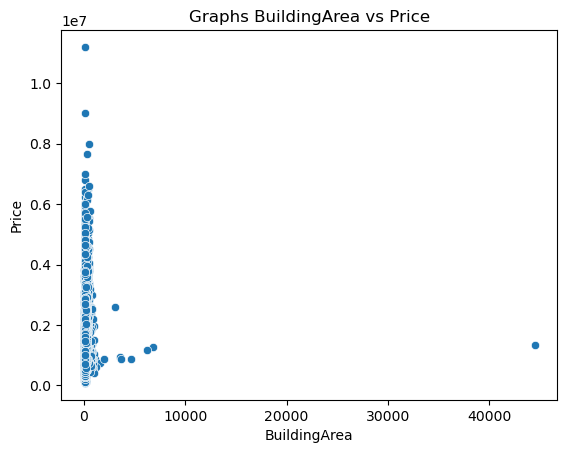

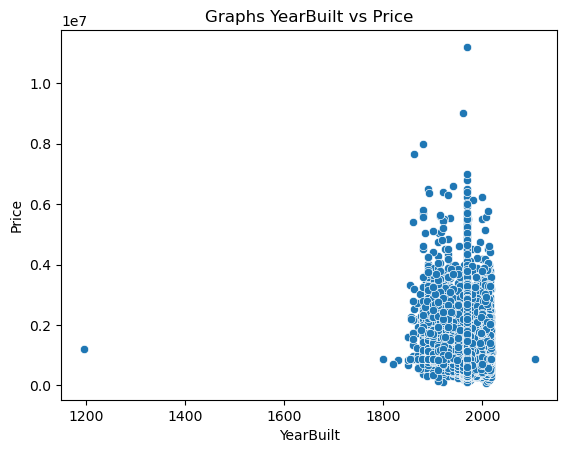

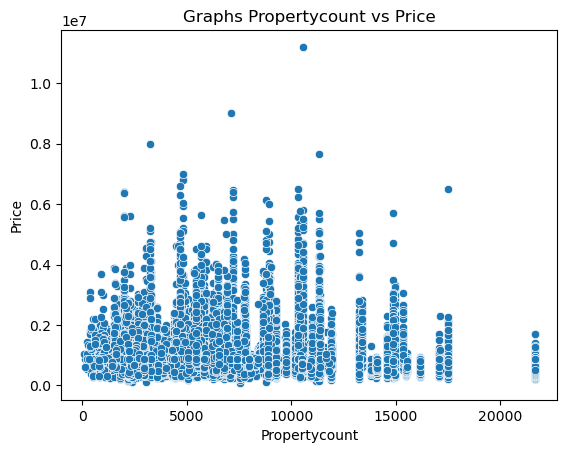

In [20]:
#Nümerik değişkenlerin değerlerini görselleştirelim.
variables=['Rooms',
  'Price',
  'Distance',
  'Bedroom2',
  'Bathroom',
  'Car',
  'Landsize',
  'BuildingArea',
  'YearBuilt',
  'Propertycount']

for variable in variables:
    sns.scatterplot(x=variable, y="Price", data=df)
    plt.title(f"Graphs {variable} vs Price")
    plt.show()

In [21]:
#Aykırı değerleri gözlemleyelim ve veri setimizden kaldıralım.
def find_outliers(col):
    z=np.abs(stats.zscore(col))
    idx_outliers=np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)
idx=find_outliers(df["Landsize"])
idx2=find_outliers(df["BuildingArea"])
idx3=find_outliers(df["YearBuilt"])
a=df.loc[idx]
b=df.loc[idx2]
c=df.loc[idx3]
d=pd.concat([a,b,c],join="inner")
df.drop(d.index, inplace = True)
df.reset_index(drop=True,inplace=True)
(round((df.describe().T),2))

,count,mean,std,min,25%,50%,75%,max
Rooms,34067.0,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,34067.0,1001694.09,560705.73,85000.00,690000.00,870000.00,1140000.00,11200000.00
Distance,34067.0,11.31,6.75,0.00,6.50,10.40,14.00,48.10
Postcode,34067.0,3116.09,109.38,3000.00,3049.00,3103.00,3156.00,3978.00
Bedroom2,34067.0,3.06,0.86,0.00,3.00,3.00,3.00,30.00
Bathroom,34067.0,1.71,0.65,0.00,1.00,2.00,2.00,12.00
Car,34067.0,1.81,0.87,0.00,1.00,2.00,2.00,26.00
Landsize,34067.0,517.72,415.86,0.00,372.50,521.00,600.00,8680.00
BuildingArea,34067.0,143.11,54.21,0.00,136.00,136.00,136.00,859.00
YearBuilt,34067.0,1969.62,21.79,1893.00,1970.00,1970.00,1970.00,2019.00


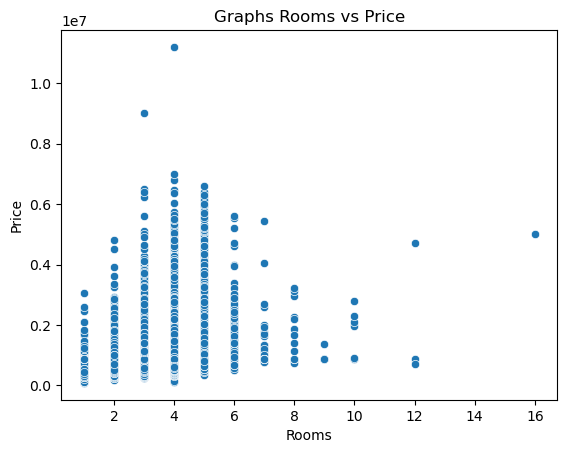

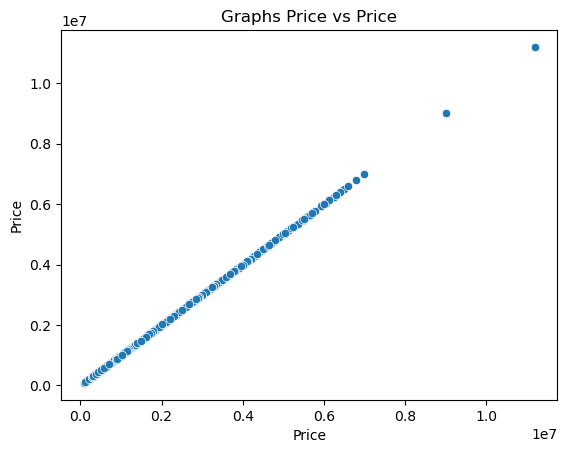

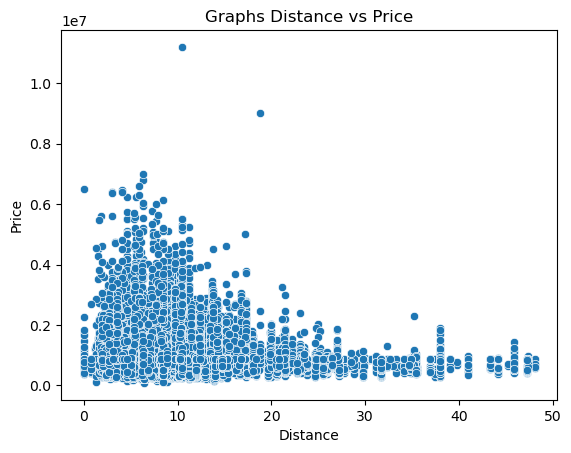

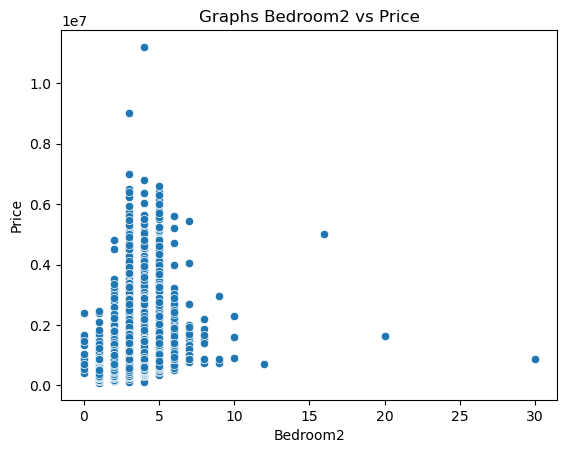

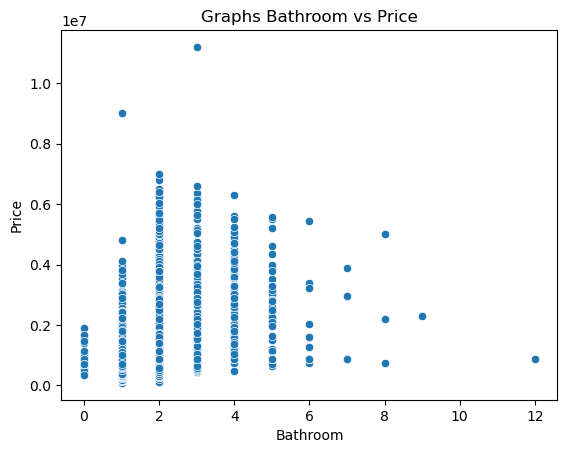

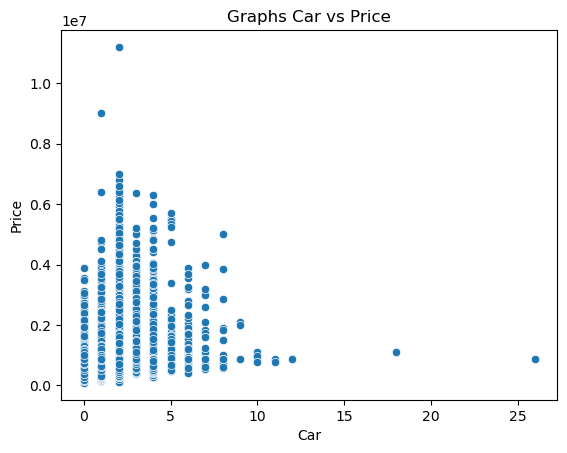

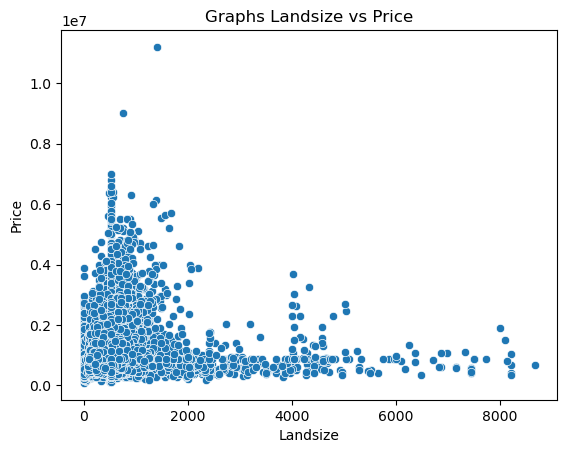

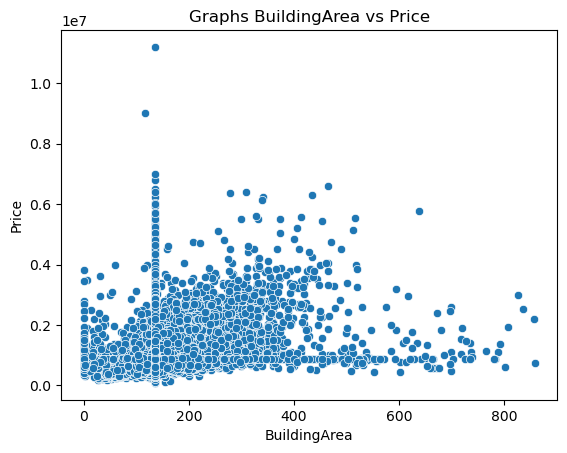

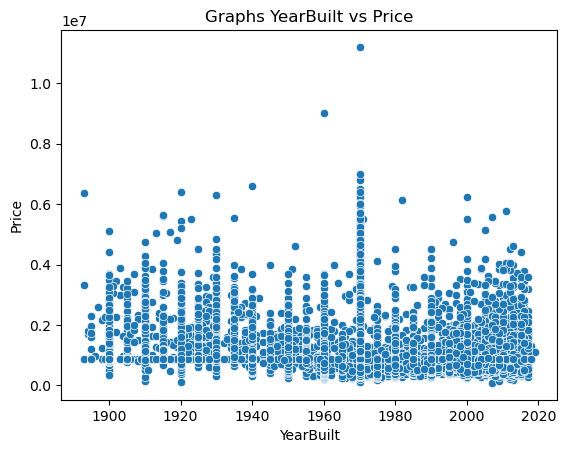

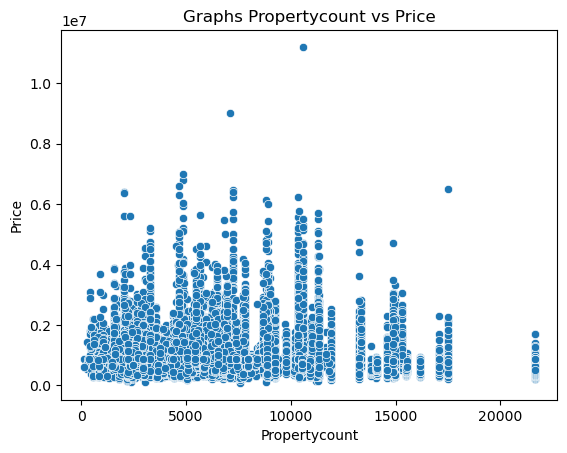

In [22]:
#Aykırı değerleri kaldırdıktan sonra veri setimin görselleştirmesine tekrar bakalım , nasıl değişiklikler oldu.
variables=['Rooms',
  'Price',
  'Distance',
  'Bedroom2',
  'Bathroom',
  'Car',
  'Landsize',
  'BuildingArea',
  'YearBuilt',
  'Propertycount']

for variable in variables:
    sns.scatterplot(x=variable, y="Price", data=df)
    plt.title(f"Graphs {variable} vs Price")
    plt.show()

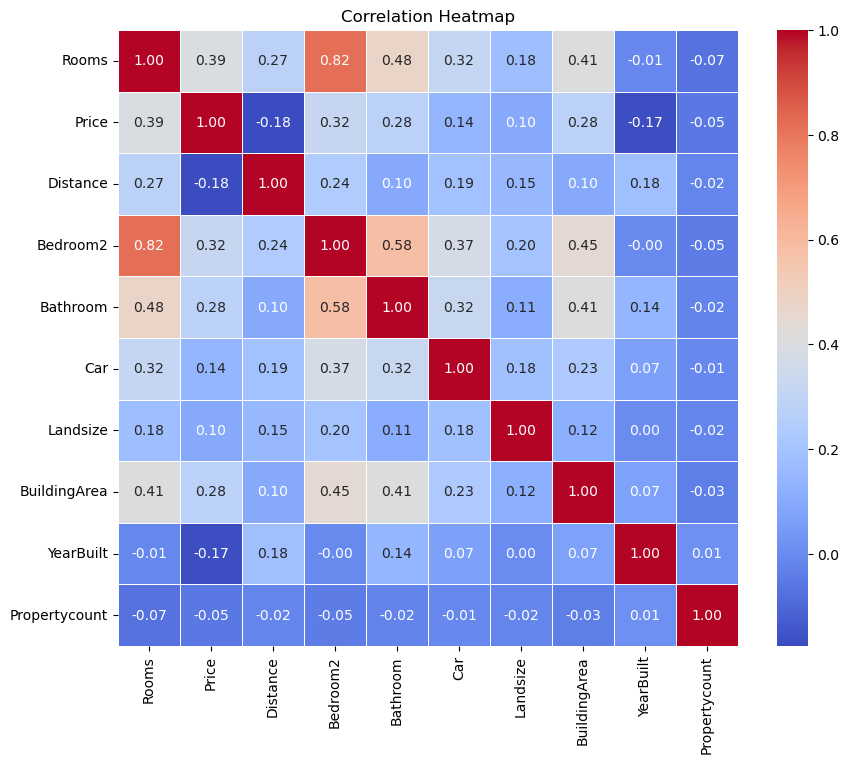

In [23]:
correlation_matrix = df[variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### LABEL ENCODİNG

In [24]:
# Veri setimizde bulunan kategorik değişkenleri sayısal etiketlere çevirelim.
categorical_columns=['Type', 'Method', 'Regionname',"Address",'Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']
encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

In [25]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,28839,2,0,870000.0,6,155,58,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,31,-37.8014,144.9958,2,4019.0
1,0,31809,2,0,1480000.0,2,33,60,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,31,-37.7996,144.9984,2,4019.0
2,0,15084,2,0,1035000.0,2,33,63,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
3,0,9560,3,2,870000.0,7,296,63,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,31,-37.8114,145.0116,2,4019.0
4,0,24608,3,0,1465000.0,5,33,64,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0


## MODELING 

### KNEIGHBORS REGRESYON

In [26]:
#Veri setimizi ayıralım.
X = df.drop("Price", axis=1)
y=df["Price"]
# Train ve test seti olarak ayırdım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Standartlaştırma yapalım.
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [28]:
y_pred = knn_model.predict(X_test)

In [29]:
mae = round(mean_absolute_error(y_test, y_pred))
mse = round(mean_squared_error(y_test, y_pred, squared=True), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(r2_score(y_test, y_pred), 2)
print(f" Mean Absolute Error:{mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared:{r2}")

 Mean Absolute Error:260198
Mean Squared Error: 197513773489.43
Root Mean Squared Error: 444425.22
R-squared:0.42


### LINEAR REGRESSION

In [30]:
X = df.drop(['Price'],axis=1) # Features
y= df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print((mean_squared_error(y_test, y_pred, squared=True), 2))
print((mean_squared_error(y_test, y_pred, squared=False), 2))
print(round(r2_score(y_test, y_pred), 2))

453971.443073514
(206090071126.24875, 2)
(453971.443073514, 2)
0.38


### LASSO REGRESSION

In [34]:
#Lasso regresyon modelinin değerlerine bakalım.
model= Lasso()
model.fit(X_train , y_train)

y_pred= model.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred))
mse = round(mean_squared_error(y_test, y_pred, squared=True), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(r2_score(y_test, y_pred), 2)
print(f" Mean Absolute Error:{mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared:{r2}")

 Mean Absolute Error:286663
Mean Squared Error: 206090266183.9
Root Mean Squared Error: 453971.66
R-squared:0.38


### RiDGE REGRESYON

In [35]:
model= Ridge()
model.fit(X_train , y_train)

y_pred= model.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred))
mse = round(mean_squared_error(y_test, y_pred, squared=True), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(r2_score(y_test, y_pred), 2)
print(f" Mean Absolute Error:{mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared:{r2}")

 Mean Absolute Error:286663
Mean Squared Error: 206090961692.03
Root Mean Squared Error: 453972.42
R-squared:0.38


### RANDOMFOREST REGRESYON

In [38]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(X_train , y_train)

y_pred= model.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred))
mse = round(mean_squared_error(y_test, y_pred, squared=True), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(r2_score(y_test, y_pred), 2)
print(f" Mean Absolute Error:{mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared:{r2}")


 Mean Absolute Error:228058
Mean Squared Error: 166865529684.11
Root Mean Squared Error: 408491.77
R-squared:0.5


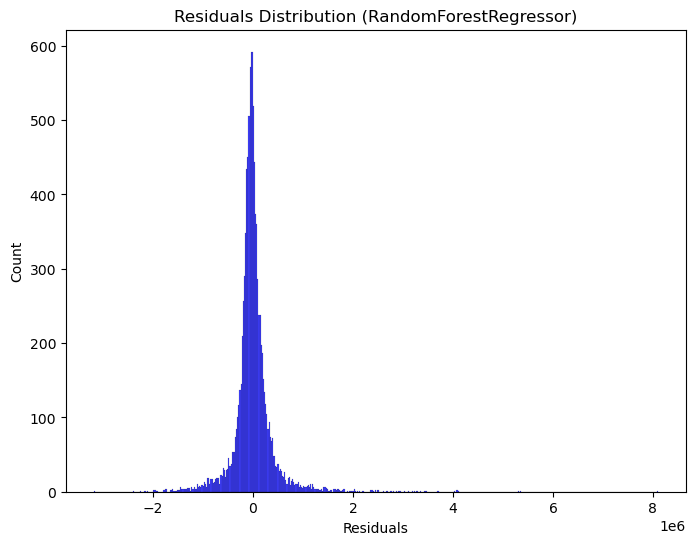

In [40]:
# Tahminleri ve gerçek değerleri içeren bir DataFrame oluşturun
residuals = y_test - y_pred
residuals_df = pd.DataFrame({'Residuals': residuals})

# Hata dağılımını görselleştirin
plt.figure(figsize=(8, 6))
sns.histplot(residuals_df['Residuals'], kde=False, color='blue', edgecolor='black')
plt.title('Residuals Distribution (RandomForestRegressor)')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show()